# Consumer Choice

We will look at a small example from consumer choice with a CES utility function (constant elasticity of substitution). 

In [0]:
import numpy as np
from matplotlib import pyplot as plt

The utility function is given by: 
$$u(X,Y) = \left(X^{\rho} + Y^{\rho} \right)^{\tfrac{1}{\rho}} $$

Here are some functions which may be useful...

In [0]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)
def mu_x(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(x**(rho-1.0))
def mu_y(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(y**(rho-1.0))
def tms(x,y,rho):
    return - (x/y)**(rho-1.0)


We can plot the utility function with a contour plot and a meshgrid...

In [0]:
xs = np.linspace(1.0,50.0,50)
ys = xs
X, Y = np.meshgrid(xs, ys)

In [5]:
Y

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       ...,
       [48., 48., 48., ..., 48., 48., 48.],
       [49., 49., 49., ..., 49., 49., 49.],
       [50., 50., 50., ..., 50., 50., 50.]])

In [0]:
rho = 0.2
U = u(X,Y,rho)

In [7]:
U

array([[  32.        ,   45.80124218,   57.12005431, ...,  319.57478804,
         324.11977211,  328.64146397],
       [  45.80124218,   64.        ,   78.70640685, ...,  401.92732692,
         407.38593957,  412.81386212],
       [  57.12005431,   78.70640685,   96.        , ...,  464.24426278,
         470.36910358,  476.45766359],
       ...,
       [ 319.57478804,  401.92732692,  464.24426278, ..., 1536.        ,
        1551.9340188 , 1567.73874722],
       [ 324.11977211,  407.38593957,  470.36910358, ..., 1551.9340188 ,
        1568.        , 1583.93535182],
       [ 328.64146397,  412.81386212,  476.45766359, ..., 1567.73874722,
        1583.93535182, 1600.        ]])

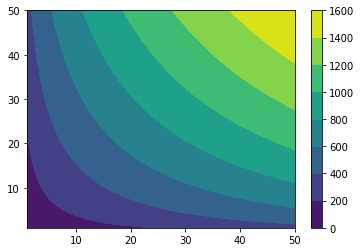

In [8]:
cp = plt.contourf(X, Y, U)
plt.colorbar(cp)

Let's also do a plot with the TMS as a function of $X/Y$ (it only depends on the ratio). 

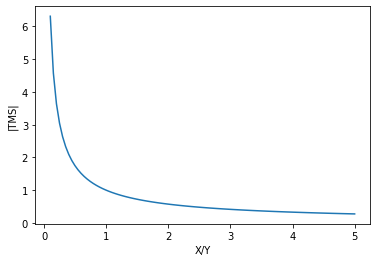

In [0]:
plt.figure()
yfix = 10
tmss = [-tms(x*yfix,yfix,rho) for x in np.linspace(0.1,5,100)]
plt.plot(np.linspace(0.1,5,100),tmss)
plt.xlabel('X/Y')
plt.ylabel('|TMS|')
plt.show()

We have seen that a necessary condition for an optimum is  $|TMS| = \tfrac{p_X}{p_Y}$. So, 

$$ \frac{X}{Y} = \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}} $$

We are missing the budget constraint to fix the quantities. We have :

$$ p_X \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}}Y + p_Y Y = I $$

Therefore, if we denote $r = \frac{\rho}{\rho-1}$ we obtain: 

$$ \left(p_X^r p_Y^{1-r} + p_Y \right) Y = I $$



$$ Y^* = \frac{p_Y^{r-1}}{ p_X^r + p_Y^r }I $$

and 


$$ X^* = \frac{p_X^{r-1}}{ p_X^r + p_Y^r }I $$


# Relationship with Price

We can see how demand varies with prices $p_X$ and $p_Y$. The value of $\rho$ is very important...

In [0]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 

We can do an experiment where we vary $\rho$ and evaluate how demand varies with own price and price of the other good.

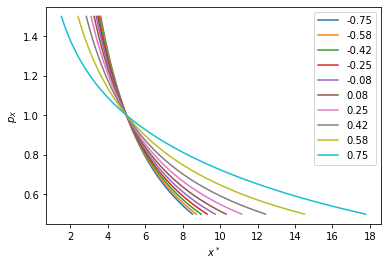

In [0]:
prices = np.linspace(0.5,1.5,100)
I = 10.0
rhos = np.linspace(-0.75,0.75,10)
plt.figure()
for rho in rhos: 
  xstars = [xstar(p,1.0,I,rho) for p in prices]
  plt.plot(xstars,prices,label=str(np.round(rho,2)))
plt.xlabel('$x^*$')
plt.ylabel('$p_X$')
plt.legend()
plt.show()

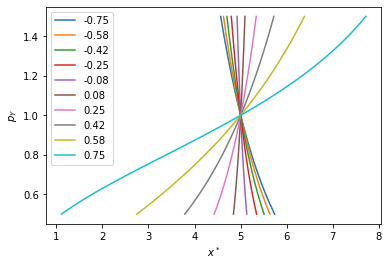

In [0]:
prices = np.linspace(0.5,1.5,100)
I = 10.0
rhos = np.linspace(-0.75,0.75,10)
plt.figure()
for rho in rhos: 
  xstars = [xstar(1.0,p,I,rho) for p in prices]
  plt.plot(xstars,prices,label=str(np.round(rho,2)))
plt.xlabel('$x^*$')
plt.ylabel('$p_Y$')
plt.legend()
plt.show()

For $\rho>0$ we have substitute goods and for $\rho<0$,goods become complementary. Let's evaluate optimal choice in the plan ($X,Y$). 

In [0]:
px = 1.0
py = 1.0
I = 10.0
rho = 0.5
xopt = xstar(px,py,I,rho)
yopt = ystar(px,py,I,rho)
vopt = u(xopt,yopt,rho)

In [0]:
def bud(x,px,py,I):
    return I/py - px/py * x

In [0]:
def indf(x,v,rho):
    return (v**rho - x**rho)**(1.0/rho)

In [0]:
xs = np.linspace(1.0,10.0,100)

In [0]:
yb = [bud(x,px,py,I) for x in xs]

In [0]:
ys = [indf(x,vopt,rho) for x in xs]

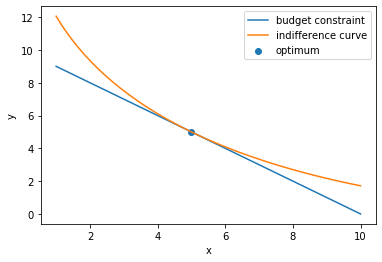

In [0]:
plt.figure()
plt.plot(xs,yb,label='budget constraint')
plt.plot(xs,ys,label='indifference curve')
plt.scatter(xopt,yopt,label='optimum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The CES function is used a lot in consumer as well as producer theory. 